In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from pandas.api.types import CategoricalDtype
import warnings #для удаления предупреждения при переименовании подписей диаграмм
warnings.filterwarnings("ignore", category=UserWarning)

churn_data = pd.read_csv('churn.csv')
display(churn_data.head(10))

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Статус клиента      10000 non-null  object 
 14  Активность клиента  10000 non-null  object 
dtypes: float64(2), int64(8), object(5)
memory usage: 1.1+ 

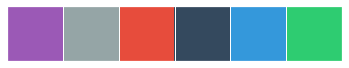

In [2]:
# Предобработка данных
# Удаление столбца RowNumber
churn_data = churn_data.drop(['RowNumber'], axis = 1)

#Приведение баланса и зарплаты к виду "тыс.Р"
def change_number(number):
    return number/1000
churn_data['EstimatedSalary'] = churn_data['EstimatedSalary'].apply(change_number)
churn_data['Balance'] = churn_data['Balance'].apply(change_number)

#Приведение признаков 'Exited' и 'IsActiveMember' к текстовому виду 
def change_name(exited):
    if exited == 0:
        res = 'Лояльный'
    elif exited == 1:
        res = 'Ушедший'
    return res
churn_data['Статус клиента'] = churn_data['Exited'].apply(change_name)
def change_activity(active):
    if active == 0:
        res = 'Активный'
    elif active == 1:
        res = 'Неактивный'
    return res
churn_data['Активность клиента'] = churn_data['IsActiveMember'].apply(change_activity)

#Настройка цветовой гаммы 
sns.set_theme(style = "darkgrid")
clrmap = ["#9b59b6", "#95a5a6", "#e74c3c", "#34495e","#3498db", "#2ecc71"]
sns.set_palette(clrmap)
sns.palplot(sns.color_palette())

churn_data.info()

## 1.Соотношение ушедших и лояльных клиентов

In [3]:
task_1 = churn_data['Exited'].value_counts()

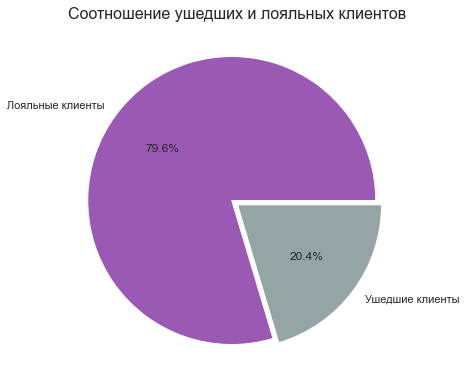

In [4]:
fig_1 = plt.figure(figsize = (5, 5))

axes_1 = fig_1.add_axes([0, 0, 1, 1])
axes_1.set_title('Соотношение ушедших и лояльных клиентов', fontsize = 16)
axes_1.pie(
    task_1,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct = '%.1f%%',
    explode = [0.05, 0]
    );

fig_1.show()

Пятая часть от общего количества клиентов покинула банк.

## 2. Распределение баланса пользователей

In [5]:
task_2 = churn_data[churn_data['Balance'] > 2.5]

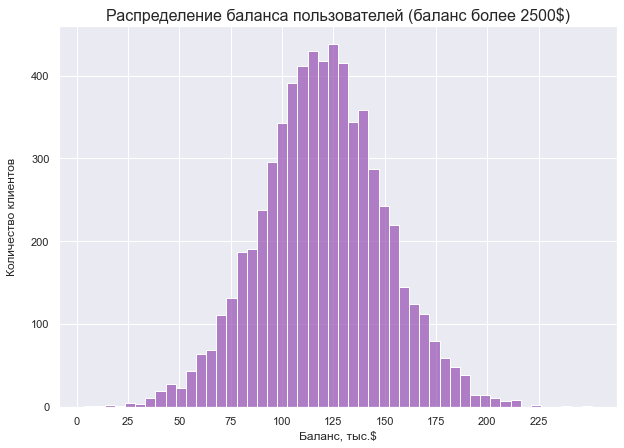

In [6]:
fig_2, axes_2 = plt.subplots(figsize = (10, 7))

axes_2.set_xticks(range(0, 250, 25))
hist_2 = sns.histplot(
    data = task_2,
    x = 'Balance',
    bins = 50,
    );
hist_2.set_title('Распределение баланса пользователей (баланс более 2500$)', fontsize = 16);
hist_2.set_xlabel('Баланс, тыс.$');
hist_2.set_ylabel('Количество клиентов');
hist_2.yaxis.set_label_coords(-0.075, 0.5)

fig_2.show()

По построенной гистограмме можно сделать вывод, что баланс пользователей , у которых на счету более 2500$, носит характер нормального распределения. У большей части клиентов значение баланса варьируется от 100 до 150 тысяч долларов

## 3. Распределение баланса ушедших и лояльных пользователей

In [7]:
task_3 = churn_data[churn_data['Balance'] > 2.5]
task_3.groupby('Статус клиента')['Balance'].agg('describe').round(1)

count   mean   std   min    25%    50%    75%    max
Статус клиента                                                       
Лояльный        4846.0  119.5  29.9  14.3   99.1  119.8  139.7  221.5
Ушедший         1537.0  120.7  30.6   3.8  103.7  119.9  138.0  250.9

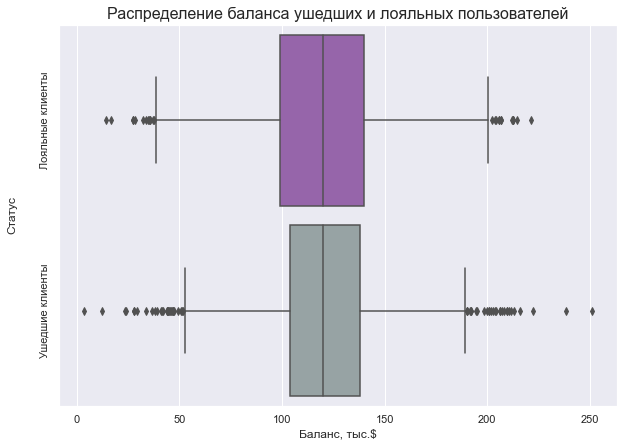

In [8]:
fig_3 = plt.figure(figsize = (10, 7));

boxplot_3 = sns.boxplot(
    data = task_3,
    y = 'Статус клиента',
    x = 'Balance',
    orient = 'h',
    width = 0.9
    );
boxplot_3.set_title('Распределение баланса ушедших и лояльных пользователей', fontsize = 16);
boxplot_3.set_yticklabels(('Лояльные клиенты', 'Ушедшие клиенты'), va = 'center');
boxplot_3.set_xlabel('Баланс, тыс.$');
boxplot_3.set_ylabel('Статус');
boxplot_3.yaxis.set_tick_params(rotation = 90);
boxplot_3.yaxis.set_label_coords(-0.075, 0.5)

fig_3.show()

По полученным данным можно сделать вывод, что суммы на накопительном счёте ушедших и лояльных клиентов не отличаются. Отток клиентов банка не связан с данным признаком.  

## 4. Распределение возраста ушедших и лояльных пользователей

In [9]:
churn_data.groupby('Статус клиента')['Age'].agg('describe')

count       mean        std   min   25%   50%   75%   max
Статус клиента                                                            
Лояльный        7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
Ушедший         2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0

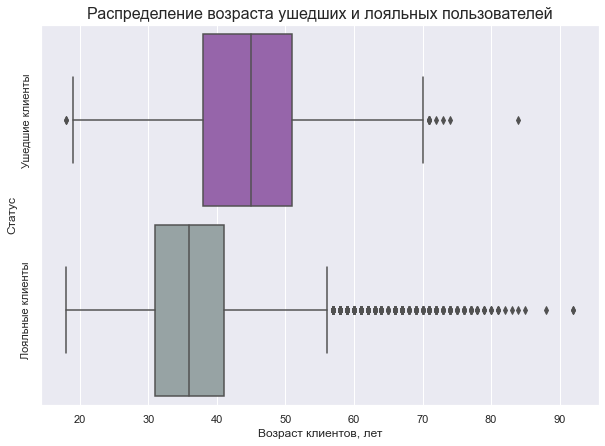

In [10]:
fig_4 = plt.figure(figsize = (10, 7));

boxplot_4 = sns.boxplot(
    data = churn_data,
    y = 'Статус клиента',
    x = 'Age',
    orient = 'h',
    width = 0.9
    );
boxplot_4.set_yticklabels(('Ушедшие клиенты', 'Лояльные клиенты'), va = 'center');
boxplot_4.set_title('Распределение возраста ушедших и лояльных пользователей', fontsize = 16);
boxplot_4.set_xlabel('Возраст клиентов, лет');
boxplot_4.set_ylabel('Статус');
boxplot_4.yaxis.set_tick_params(rotation = 90);

plt.show()

Средний возраст лояльных клиентов ниже на 7 лет, причем в этой группе существенное количество аномалий в виде возрастных пользователей (более 55 лет). Банку стоит обратить внимание на данную аудиторию.

## 5. Связь кредитного рейтинга клиента и его предполагаемой зарплаты

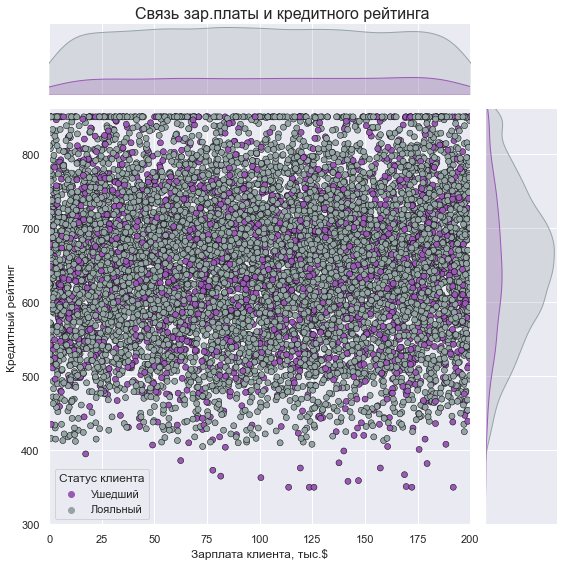

In [11]:
jointplot_5 = sns.jointplot(
    data = churn_data, 
    x = 'EstimatedSalary', 
    y = 'CreditScore',
    hue = 'Статус клиента',
    xlim = (0, 200),
    ylim = (300, 860),
    height = 8,
    edgecolor = 'black'
    );
jointplot_5.set_axis_labels('Зарплата клиента, тыс.$', 'Кредитный рейтинг');
jointplot_5.ax_joint.legend(title = 'Статус клиента');
jointplot_5.fig.suptitle('Связь зар.платы и кредитного рейтинга', fontsize = 16);
jointplot_5.fig.subplots_adjust(top = 0.95);

plt.show()

Взаимосвязи между исследуемыми признаками не наблюдается. Наиболее вероятное значение кредитного рейтинга лежит в промежутке от 600 до 700 для обеих групп клиентов. Распределение по зарплатам можно считать равномерным.

## 6. Процент ушедших клиентов

In [12]:
task_6 = (churn_data.pivot_table(
    values = 'Exited',
    index = 'Gender',
    aggfunc = 'mean',
    ).round(2)*100).reset_index()

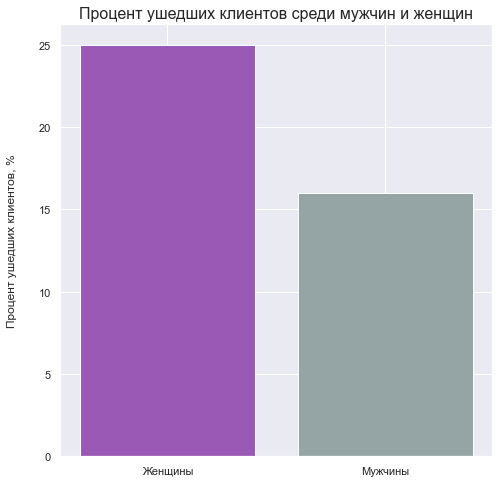

In [13]:
fig_6 = plt.figure(figsize = (6, 6));

axes_6 = fig_6.add_axes([0, 0, 1, 1]);
axes_6.set_xticklabels(['Женщины', 'Мужчины']);
axes_6.bar(data = task_6, x = 'Gender', height = 'Exited', color = clrmap[0:2]);
axes_6.set_ylabel('Процент ушедших клиентов, %');
axes_6.yaxis.set_label_coords(-0.1, 0.5)
axes_6.set_title('Процент ушедших клиентов среди мужчин и женщин', fontsize = 16);

plt.show()

Среди женщин отток клиентов выше в 1,5 раза. 

## 7. Отток клиентов и число приобретённых у банка услуг

In [14]:
#Создание сводной таблицы
task_7 = churn_data.pivot_table(
    values = 'Exited',
    index = ['NumOfProducts', 'Статус клиента'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Количество клиентов', 'Exited': '', 'NumOfProducts': 'Количество приобретенных услуг'});

#Список значений процента ушедших клиентов, сгруппированных по количеству приобретенных услуг
procent_list = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'NumOfProducts',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_7)

Количество приобретенных услуг Статус клиента Количество клиентов
                                                                   
0                              1       Лояльный                3675
1                              1        Ушедший                1409
2                              2       Лояльный                4242
3                              2        Ушедший                 348
4                              3       Лояльный                  46
5                              3        Ушедший                 220
6                              4        Ушедший                  60

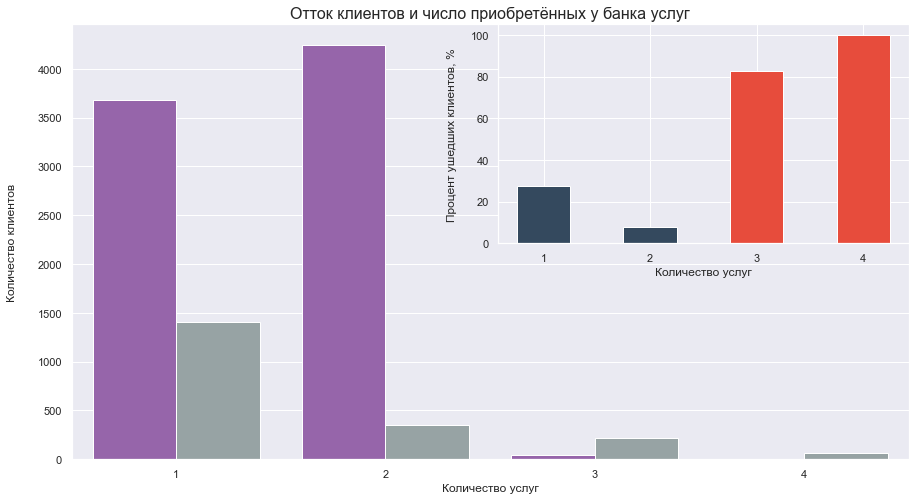

In [15]:
fig_7 = plt.figure(figsize=(15, 8))

# основной график
barplot_7 = sns.barplot(
    data = task_7,
    x = 'Количество приобретенных услуг',
    y = ('Количество клиентов', ''),
    hue = 'Статус клиента',
    );
barplot_7.set_title('Отток клиентов и число приобретённых у банка услуг', fontsize=16);
barplot_7.legend(title = '');
barplot_7.set_xlabel('Количество услуг');
barplot_7.set_ylabel('Количество клиентов');
barplot_7.yaxis.set_label_coords(-0.065, 0.5)

# диаграмма, демонстрирующая долю ушедших клиентов при разном количестве приобретенных услуг
insert_axes_7 = fig_7.add_axes([0.52, 0.5, 0.38, 0.38]);
insert_axes_7.bar(x = task_7['Количество приобретенных услуг'].unique(), height = procent_list, width = 0.5, color = [clrmap[3] if (i < 50) else clrmap[2] for i in procent_list]);
insert_axes_7.set_ylabel('Процент ушедших клиентов, %');
insert_axes_7.yaxis.set_label_coords(-0.1, 0.5)
insert_axes_7.set_xticks(range(1, 5, 1));
insert_axes_7.set_xlabel('Количество услуг');

plt.show()

Для наглядности к многоуровневой добавлена диаграмма, демонстрирующая долю ушедших клиентов при разном количестве приобретенных услуг. Более 80% клиентов, которые приобрели 3 услуги, покинули банк. Все клиенты, приобретшие 4 услуги, также ушли. Вероятно, банку стоит позаботиться над списком и качеством оказываемых услуг. 

## 8. Влияние статуса активного клиента на отток клиентов

In [16]:
#Создание сводной таблицы
task_8 = churn_data.pivot_table(
    values = 'Exited',
    index = ['Активность клиента', 'Статус клиента'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Количество клиентов', 'Exited': ''});

#Список значений процента ушедших клиентов, сгруппированных по признаку активности клиентов
procent_list_active = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'IsActiveMember',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_8)

Активность клиента Статус клиента Количество клиентов
                                                       
0           Активный       Лояльный                3547
1           Активный        Ушедший                1302
2         Неактивный       Лояльный                4416
3         Неактивный        Ушедший                 735

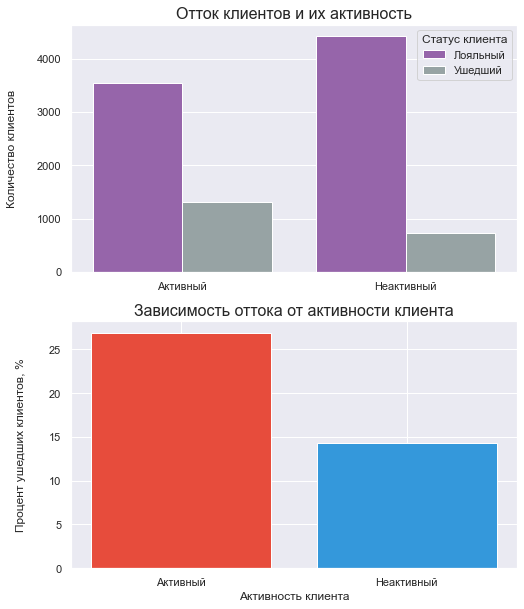

In [17]:
fig_8, axes_8 = plt.subplots(nrows = 2, ncols = 1, figsize = (8, 10))
plt.subplots_adjust(hspace = 0.2)

# основной график
barplot_8_1 = sns.barplot(
    data = task_8,
    x = 'Активность клиента',
    y = 'Количество клиентов',
    hue = 'Статус клиента',
    ax = axes_8[0]
    );
barplot_8_1.set_title('Отток клиентов и их активность', fontsize=16);
barplot_8_1.yaxis.set_label_coords(-0.12, 0.5)
barplot_8_1.set_xlabel('')

# диаграмма, демонстрирующая долю ушедших клиентов для активных и неактивных клиентов
axes_8[1].bar(
    x = task_8['Активность клиента'].unique(),
    height = procent_list_active,
    color = clrmap[2:5:2],
    );
axes_8[1].yaxis.set_label_coords(-0.1, 0.5)
axes_8[1].set_ylabel('Процент ушедших клиентов, %');
axes_8[1].set_title('Зависимость оттока от активности клиента', fontsize = 16);
axes_8[1].set_xlabel('Активность клиента');

plt.show()

Большая доля клиентов (>50%) - неактивны. Среди актвных существенно выше процент тех, кто покинул банк. Это снова можно связать с набором предложений и услуг от банка, а также их качестовм. 

## 9. Доля ушедших клиентов по странам

In [18]:
task_9 = churn_data.pivot_table(
    values = 'Exited',
    index = ['Geography', 'Статус клиента'],
    aggfunc = ['count'],
    ).reset_index().rename(columns={'count': 'Количество клиентов', 'Exited': '', 'Geography': 'Страна'});

procent_list_country = list(((churn_data.pivot_table(
    values = 'Exited',
    index = 'Geography',
    aggfunc = 'mean',
    )).Exited.values*100).round(2));

display(task_9)

Страна Статус клиента Количество клиентов
                                             
0   France       Лояльный                4204
1   France        Ушедший                 810
2  Germany       Лояльный                1695
3  Germany        Ушедший                 814
4    Spain       Лояльный                2064
5    Spain        Ушедший                 413

In [19]:
fig_9 = px.choropleth(
    data_frame = task_9, 
    locations = 'Страна', 
    locationmode = 'country names', 
    color = task_9['Количество клиентов', ''].values,
    animation_frame = 'Статус клиента', 
    range_color = [0, 5000], 
    title = 'Распределение лояльных и ушедших клиентов по странам', 
    width = 800, 
    height = 500, 
    color_continuous_scale = 'Turbo'
    );

fig_9.show()

Максимальная доля ушедших клиентов  - в Германии (хотя это гораздо лучше по сводной таблице). Это может быть связано с тем, что у Германии больше сухопутных границ и, соотвественно, доступа к банкам и продуктам прочих Европейских государств. 

## 10. Кредитный рейтинг и количество лет, в течение которых клиент пользуется услугами банка

In [20]:
# Функция для перевода признака CreditScore в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Очень низкий"
    elif credit_score >= 500 and credit_score < 601:
        return "Низкий"
    elif credit_score >= 601 and credit_score < 661:
        return "Средний"
    elif credit_score >= 661 and credit_score < 781:
        return "Хороший"
    elif credit_score >= 781 and credit_score < 851:
        return "Превосходный"
    elif credit_score >= 851:
        return "Топ"
    elif credit_score < 300:
        return "Недопустимо низкий"

# сортировка категорий
cat_dtype = CategoricalDtype(
    categories = ["Топ", "Превосходный", "Хороший", "Средний", "Низкий", "Очень низкий", "Недопустимо низкий"], 
    ordered = True);
churn_data['CreditScore'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype(cat_dtype)

In [21]:
task_10 = churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScore',
    columns = 'Tenure',
    aggfunc = 'mean',
    ).round(2)*100

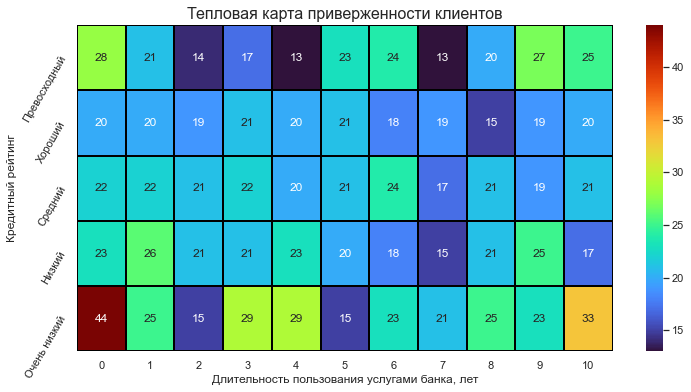

In [22]:
fig_10 = plt.figure(figsize = (12, 6));

heatmap_10 = sns.heatmap(task_10, annot = True, cmap = 'turbo', linewidths = 1, linecolor = 'black');
heatmap_10.set_title('Тепловая карта приверженности клиентов', fontsize = 16);
heatmap_10.set_xlabel('Длительность пользования услугами банка, лет');
heatmap_10.set_ylabel('Кредитный рейтинг');
heatmap_10.yaxis.set_tick_params(rotation=60);

plt.show()

Ожидаемо чаще всего уходят клиенты с низким кредитным рейтингом и коротким сроком знакомства - вероятнее всего это клиенты, которым сразу отказали. Есть аномалии среди клиентов с самым высоким рейтингом, это предположительно связно с тем, что хороших клиентов переманивают конкуренты. 